In [1]:
# Crypto plot

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy
plt.style.use('seaborn')
%matplotlib inline
%config InlineBackend.figure_format='retina'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = "https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=10&e=Coinbase"
f = requests.get(url)
ipdata = f.json()
pd.DataFrame(ipdata['Data']).head(5)

,time,close,high,low,open,volumefrom,volumeto
0,1597276800,11795.95,11802.09,11274.14,11566.45,15369.25,1.777590e+08
1,1597363200,11779.00,11865.97,11651.24,11795.95,13797.44,1.622473e+08
2,1597449600,11859.24,11989.98,11688.00,11779.00,12566.34,1.492883e+08
3,1597536000,11918.84,11940.00,11686.53,11859.24,8911.33,1.055127e+08
4,1597622400,12304.26,12486.61,11775.00,11918.84,23814.25,2.901579e+08


In [4]:
def get_data(date):
    """query API for 2000 days historical price data starting from "date"."""
    url = "https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=2000&toTs={}".format(
        date)
    r = requests.get(url)
    ipdata = r.json()
    return ipdata

In [5]:
def get_df(from_date, to_date):
    date = to_date
    holder = []
    # while earliest date returned is later than the earliest data requested, keep querying API # and adding results to list
    while date > from_date:
        data = get_data(date)
        holder.append(pd.DataFrame(data['Data']))
        date = data['TimeFrom']
        # join together all api queries from list
        df = pd.concat(holder, axis=0)
        # remove data points from before from_date
        df = df[df['time'] > from_date]
        # convert to timestamp
        df['time'] = pd.to_datetime(df['time'], unit='s')
        df.set_index('time', inplace=True)
        return df

In [6]:
# Make dataframe for each month to plot

df_sept = get_df(1567296000, 1569801600)
df_oct = get_df(1569888000, 1572480000)
df_nov = get_df(1572566400, 1575294994)
df_dec = get_df(1575158400, 1577824197)
df_jan = get_df(1577910597, 1580428800)
df_feb = get_df(1580515200, 1583512200)
df_mar = get_df(1583038800, 1585680770)
df_apr = get_df(1585767170, 1588268765)
df_may = get_df(1588355165, 1590946493)
df_june = get_df(1590996893, 1593543758)
df_july = get_df(1593630158, 1598224500)

# Select the close column of dataframes
df_sept_a = df_sept[['close']]
df_oct_a = df_oct[['close']]
df_nov_a = df_nov[['close']]
df_dec_a = df_dec[['close']]
df_jan_a = df_jan[['close']]
df_feb_a = df_feb[['close']]
df_mar_a = df_mar[['close']]
df_apr_a = df_apr[['close']]
df_may_a = df_may[['close']]
df_june_a = df_june[['close']]
df_july_a = df_july[['close']]

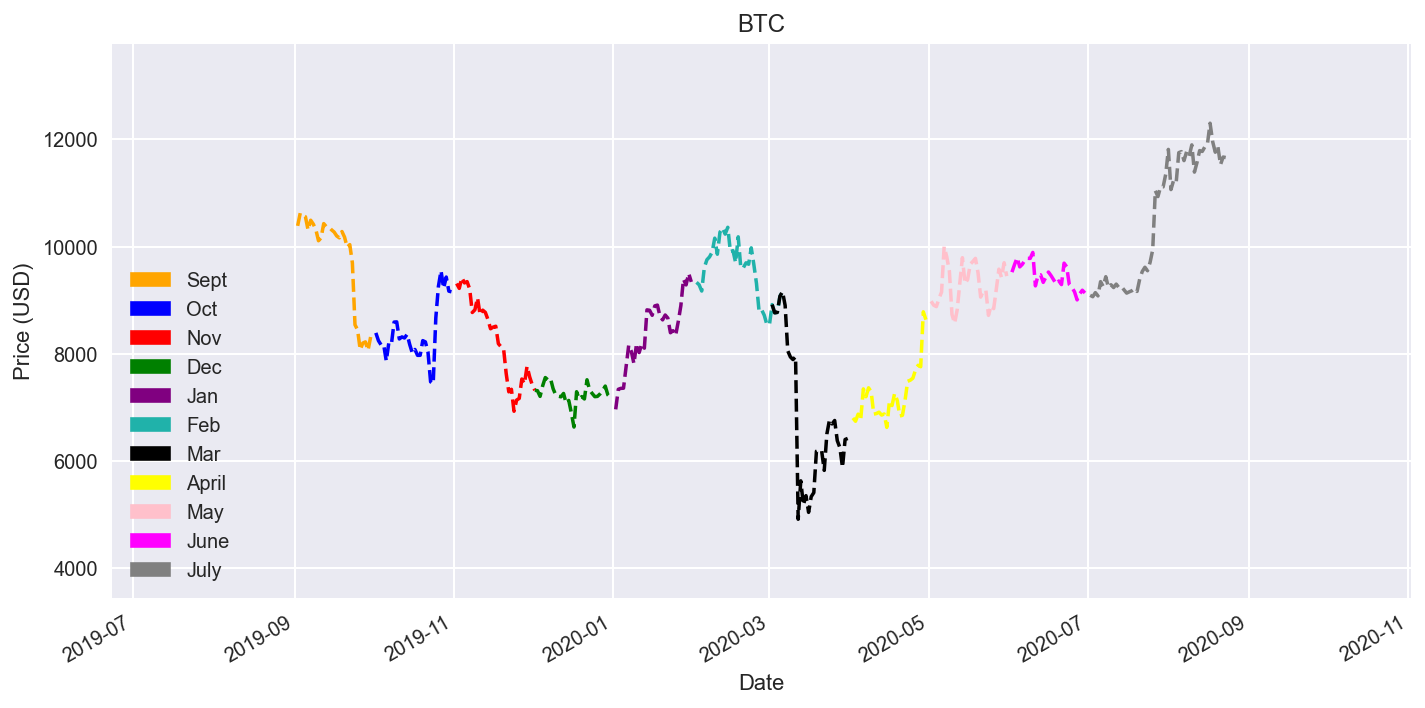

In [7]:
# Plot dataframes on same plot
plt.figure(figsize=(10,5))
plt.plot(df_sept_a, linestyle='dashed', label='September', color='orange')
plt.plot(df_oct_a, linestyle='dashed', label='October', color='blue')
plt.plot(df_nov_a, linestyle='dashed', label='November', color='red')
plt.plot(df_dec_a, linestyle='dashed', label='December', color='green')
plt.plot(df_jan_a, linestyle='dashed', label='January', color='purple')
plt.plot(df_feb_a, linestyle='dashed', label='February', color='lightseagreen')
plt.plot(df_mar_a, linestyle='dashed', label='March', color='black')
plt.plot(df_apr_a, linestyle='dashed', label='April', color='yellow')
plt.plot(df_may_a, linestyle='dashed', label='May', color='pink')
plt.plot(df_june_a, linestyle='dashed', label='June', color='magenta')
plt.plot(df_july_a, linestyle='dashed', label='July', color='gray')

# Assign the colors to corresponding months/ a legend
orange_patch = mpatches.Patch(color='orange', label='Sept')
blue_patch = mpatches.Patch(color='blue', label='Oct')
red_patch = mpatches.Patch(color='red', label='Nov')
green_patch = mpatches.Patch(color='green', label='Dec')
purple_patch = mpatches.Patch(color='purple', label='Jan')
lightseagreen_patch = mpatches.Patch(color='lightseagreen', label='Feb')
black_patch = mpatches.Patch(color='black', label='Mar')
yellow_patch = mpatches.Patch(color='yellow', label='April')
pink_patch = mpatches.Patch(color='pink', label='May')
magenta_patch = mpatches.Patch(color='magenta', label='June')
gray_patch = mpatches.Patch(color='gray', label='July')

plt.legend(
    handles=[orange_patch, blue_patch, red_patch, green_patch, purple_patch, lightseagreen_patch, black_patch, yellow_patch, pink_patch, magenta_patch, gray_patch],
    loc='lower left')
plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=30, ha='right')
plt.margins(0.2)
plt.tight_layout()
plt.savefig('plots.png', orientation='landscape', dpi=80)
plt.show();

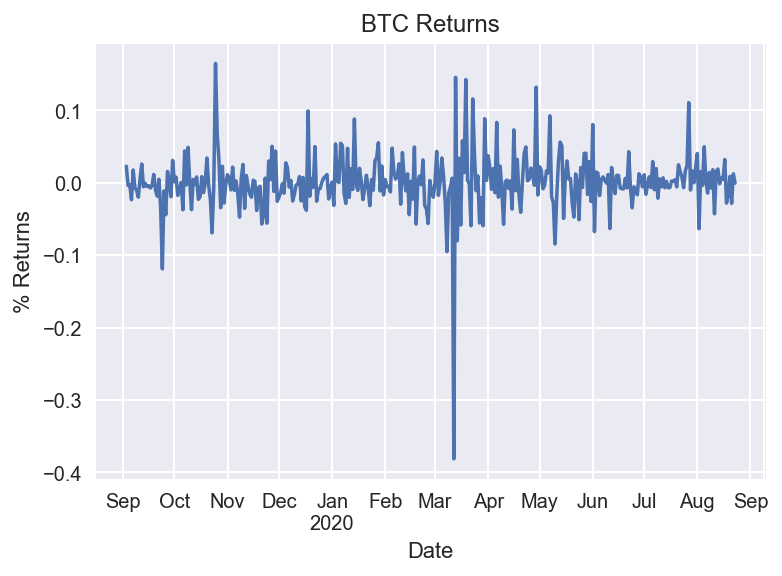

In [8]:
# September 1st - Today
df_all = get_df(1567296000, 1598224500)

# Add a returns column
df_all['Returns'] = df_all['close'].pct_change()

df_all['Returns'].plot()
plt.axis('tight')
plt.title('BTC Returns')
plt.xlabel('Date')
plt.ylabel('% Returns')
plt.show()

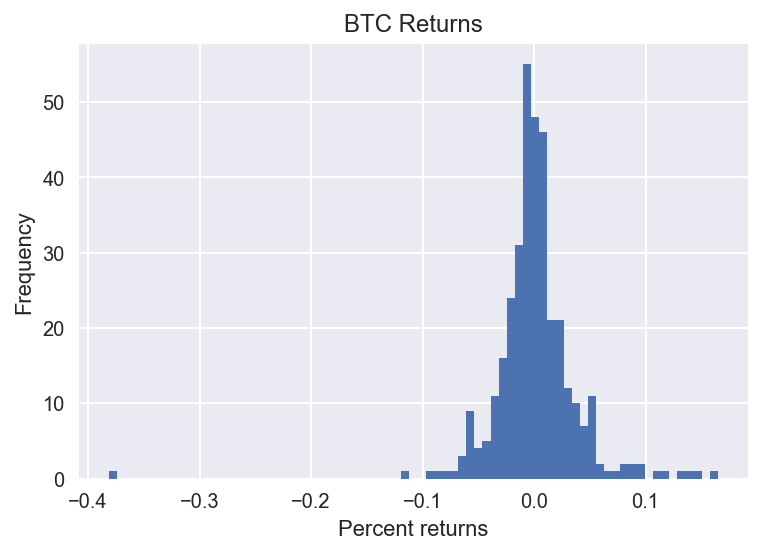

In [9]:
# Plot returns
plt.hist(df_all['Returns'].dropna(), bins=75, density=False)
plt.title('BTC Returns')
plt.xlabel('Percent returns')
plt.ylabel('Frequency')
plt.show()

In [10]:
from scipy.stats import skew

clean_returns = (df_all['Returns'].dropna())

returns_skewness = skew(clean_returns)
print(returns_skewness)

-1.8963010082422527


In [11]:
from scipy.stats import kurtosis

excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

fourth_moment = excess_kurtosis + 3
print(fourth_moment)

25.67510377153866
28.67510377153866


## Testing for normality

In [12]:
from scipy.stats import shapiro

shapiro_results = shapiro(clean_returns)
print('Shapiro results:', shapiro_results)

p_value = shapiro_results[1]
print('P-value: ', p_value)

Shapiro results: (0.8031805753707886, 1.7620572328036185e-20)
P-value:  1.7620572328036185e-20


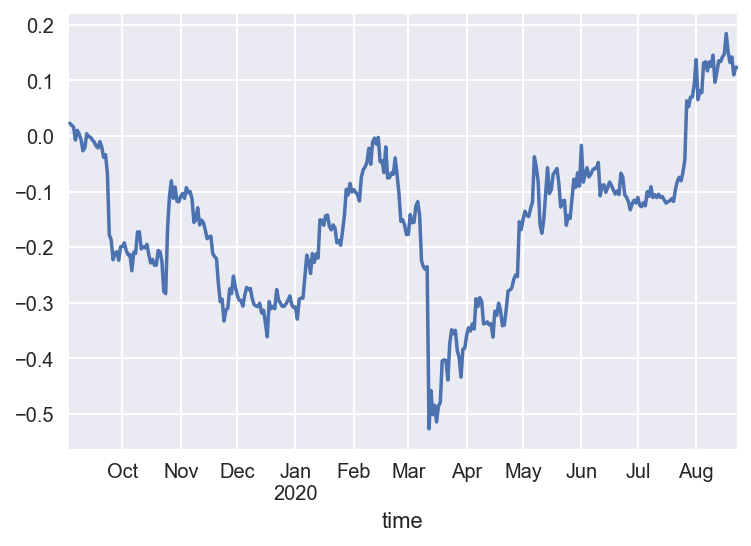

In [13]:
CumulativeReturns = ((1 + df_all['Returns']).cumprod() - 1)
CumulativeReturns.plot();